In [76]:
# Import our dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU, PReLU, ELU
from tensorflow.keras.activations import swish
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax


import pandas as pd
lung_cancer_df = pd.read_csv('survey_lung_cancer.csv')
heart_attack_df = pd.read_csv('heart_attack_analysis.csv')

LUNG CANCER ANALYSIS

In [77]:
lung_cancer_df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [78]:
# Replace 2 with 1 and 1 with 0 in the entire DataFrame
lung_cancer_df.replace({2: 1, 1: 0}, inplace=True)
lung_cancer_df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO


In [79]:
lung_cancer_df["LUNG_CANCER"].replace({'YES': 1,'NO': 0}, inplace=True)
lung_cancer_df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0


In [80]:
#dropping the GENDER column as it is not gonna be part of the model
lung_pre_df = lung_cancer_df.drop(columns=['GENDER','AGE'])
lung_pre_df.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0


Logistic Regression

In [81]:
X = lung_pre_df.drop('LUNG_CANCER', axis = 1)
y = lung_pre_df['LUNG_CANCER']

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [84]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [85]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9523809523809523
Testing Data Score: 0.8461538461538461


In [86]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
139,1,1
11,1,1
190,0,1
35,1,1
82,1,1
...,...,...
32,1,0
131,1,1
91,1,1
223,1,1


In [87]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8461538461538461

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 2,  8],
       [ 4, 64]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report
target_names = ["Yes", "No"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.33      0.20      0.25        10
          No       0.89      0.94      0.91        68

    accuracy                           0.85        78
   macro avg       0.61      0.57      0.58        78
weighted avg       0.82      0.85      0.83        78



NEURAL NETWORK

In [90]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [91]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=13))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\bohor\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [93]:
# Train the model FIRST TIME
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3801 - loss: 0.7831
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 0.6682 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.5378 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8827 - loss: 0.4656 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.4015 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8941 - loss: 0.3588 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.3191 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.2777 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9037 - loss: 0.2848 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9225 - loss: 0.2313 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.2401 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss

In [94]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - 150ms/step - accuracy: 0.8462 - loss: 0.4176
Loss: 0.41757309436798096, Accuracy: 0.8461538553237915


In [95]:
accuracy_list1 = []
loss_list1 = []
accuracy_list1.append(model_accuracy)
loss_list1.append(model_loss)

OPTIMIZATION START

In [96]:
#RELU
# Updated Model Architecture
nn = Sequential()
nn.add(Input(shape=(13,)))
nn.add(Dense(units=128, activation="relu"))
nn.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
nn.add(Dense(units=64, activation="relu"))
nn.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
nn.add(Dense(units=32, activation="relu"))
nn.add(Dense(units=1, activation="sigmoid"))

# Experiment with different optimizers
    #
# Iterate through each optimizer to find the best one
optimizers = {
    'Adamax': Adamax(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9)
}

accuracy_list2 = []
loss_list2 = []

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    # Train the model
    nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
              callbacks=[early_stopping, reduce_lr], verbose=1)

    # Evaluate the model
    loss, accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"{name} Optimizer - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    accuracy_list2.append(accuracy)
    loss_list2.append(loss)


Training with Adamax optimizer...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4082 - loss: 0.7498 - val_accuracy: 0.8718 - val_loss: 0.5368 - learning_rate: 0.0020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8423 - loss: 0.5149 - val_accuracy: 0.8718 - val_loss: 0.4466 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8864 - loss: 0.3959 - val_accuracy: 0.8718 - val_loss: 0.3974 - learning_rate: 0.0020
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8580 - loss: 0.3805 - val_accuracy: 0.8718 - val_loss: 0.3757 - learning_rate: 0.0020
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8583 - loss: 0.3461 - val_accuracy: 0.8718 - val_loss: 0.3696 - learning_rate: 0.0020
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8711 - loss: 0.2734 - val_accuracy: 0.8718 - val_loss: 0.3660 - learning_rate: 0.0020
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.

In [97]:
#leakyrelu
# Define the model
nn = Sequential()
# First hidden layer
nn.add(Dense(units=128, input_dim=13))
nn.add(LeakyReLU(alpha=0.01))  # Leaky ReLU activation
nn.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
nn.add(Dense(units=64))
nn.add(LeakyReLU(alpha=0.01))  # Leaky ReLU activation
nn.add(Dropout(0.3))  # Dropout to prevent overfitting

# Third hidden layer
nn.add(Dense(units=32))
nn.add(LeakyReLU(alpha=0.01))  # Leaky ReLU activation
nn.add(Dropout(0.3))  # Dropout to prevent overfitting

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Experiment with different optimizers
# Iterate through each optimizer to find the best one
optimizers = {
    'Adamax': Adamax(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9)
}

accuracy_list3 = []
loss_list3 = []

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    # Train the model
    nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
              callbacks=[early_stopping, reduce_lr], verbose=1)

    # Evaluate the model
    loss, accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"{name} Optimizer - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    accuracy_list3.append(accuracy)
    loss_list3.append(loss)


Training with Adamax optimizer...


c:\Users\bohor\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6824 - loss: 0.6342 - val_accuracy: 0.8718 - val_loss: 0.4546 - learning_rate: 0.0020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8604 - loss: 0.4439 - val_accuracy: 0.8718 - val_loss: 0.3911 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8863 - loss: 0.3294 - val_accuracy: 0.8718 - val_loss: 0.3646 - learning_rate: 0.0020
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8731 - loss: 0.3527 - val_accuracy: 0.8718 - val_loss: 0.3550 - learning_rate: 0.0020
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8946 - loss: 0.2927 - val_accuracy: 0.8718 - val_loss: 0.3530 - learning_rate: 0.0020
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8811 - loss: 0.2622 - val_accuracy: 0.8718 - val_loss: 0.3538 - learning_rate: 0.0020
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8834 - loss: 0.2602 - val_accuracy: 0.871

In [98]:
#ELU
# Updated Model Architecture
nn = Sequential()
nn.add(Input(shape=(13,)))
nn.add(Dense(units=128, activation="elu"))
nn.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
nn.add(Dense(units=64, activation="elu"))
nn.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
nn.add(Dense(units=32, activation="elu"))
nn.add(Dense(units=1, activation="sigmoid"))

# Experiment with different optimizers
    #
# Iterate through each optimizer to find the best one
optimizers = {
    'Adamax': Adamax(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9)
}

accuracy_list4 = []
loss_list4 = []

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    # Train the model
    nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
              callbacks=[early_stopping, reduce_lr], verbose=1)

    # Evaluate the model
    loss, accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"{name} Optimizer - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    accuracy_list4.append(accuracy)
    loss_list4.append(loss)


Training with Adamax optimizer...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5639 - loss: 0.7199 - val_accuracy: 0.7564 - val_loss: 0.5466 - learning_rate: 0.0020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8208 - loss: 0.4842 - val_accuracy: 0.8077 - val_loss: 0.4517 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9115 - loss: 0.3403 - val_accuracy: 0.8462 - val_loss: 0.3996 - learning_rate: 0.0020
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9076 - loss: 0.3001 - val_accuracy: 0.8462 - val_loss: 0.3584 - learning_rate: 0.0020
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9132 - loss: 0.2557 - val_accuracy: 0.8846 - val_loss: 0.3314 - learning_rate: 0.0020
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9385 - loss: 0.2174 - val_accuracy: 0.8846 - val_loss: 0.3131 - learning_rate: 0.0020
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9451 -

In [99]:
#PreLU
# Define the model
nn = Sequential()
# First hidden layer
nn.add(Dense(units=128, input_dim=13))
nn.add(PReLU())  # Leaky PReLU activation
nn.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
nn.add(Dense(units=64))
nn.add(PReLU())  # Leaky PReLU activation
nn.add(Dropout(0.3))  # Dropout to prevent overfitting

# Third hidden layer
nn.add(Dense(units=32))
nn.add(PReLU())  # Leaky PReLU activation
nn.add(Dropout(0.3))  # Dropout to prevent overfitting

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Experiment with different optimizers
# Iterate through each optimizer to find the best one
optimizers = {
    'Adamax': Adamax(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9)
}

accuracy_list5 = []
loss_list5 = []

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    # Train the model
    nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
              callbacks=[early_stopping, reduce_lr], verbose=1)

    # Evaluate the model
    loss, accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"{name} Optimizer - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    accuracy_list5.append(accuracy)
    loss_list5.append(loss)


Training with Adamax optimizer...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.3323 - loss: 0.7929 - val_accuracy: 0.8718 - val_loss: 0.5797 - learning_rate: 0.0020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8056 - loss: 0.5646 - val_accuracy: 0.8718 - val_loss: 0.4792 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8704 - loss: 0.4688 - val_accuracy: 0.8718 - val_loss: 0.4064 - learning_rate: 0.0020
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8668 - loss: 0.3940 - val_accuracy: 0.8718 - val_loss: 0.3677 - learning_rate: 0.0020
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8768 - loss: 0.3662 - val_accuracy: 0.8718 - val_loss: 0.3524 - learning_rate: 0.0020
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8885 - loss: 0.3069 - val_accuracy: 0.8718 - val_loss: 0.3469 - learning_rate: 0.0020
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8

In [100]:
#swish
# Updated Model Architecture
nn = Sequential()
nn.add(Input(shape=(13,)))
nn.add(Dense(units=128, activation=swish))
nn.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
nn.add(Dense(units=64, activation=swish))
nn.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
nn.add(Dense(units=32, activation=swish))
nn.add(Dense(units=1, activation="sigmoid"))

# Experiment with different optimizers
    #
# Iterate through each optimizer to find the best one
optimizers = {
    'Adamax': Adamax(learning_rate=0.002),
    'RMSprop': RMSprop(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9)
}

accuracy_list6 = []
loss_list6 = []

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    # Train the model
    nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
              callbacks=[early_stopping, reduce_lr], verbose=1)

    # Evaluate the model
    loss, accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"{name} Optimizer - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    accuracy_list6.append(accuracy)
    loss_list6.append(loss)


Training with Adamax optimizer...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5587 - loss: 0.6714 - val_accuracy: 0.8333 - val_loss: 0.6098 - learning_rate: 0.0020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8678 - loss: 0.5603 - val_accuracy: 0.8462 - val_loss: 0.5378 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9351 - loss: 0.4737 - val_accuracy: 0.8462 - val_loss: 0.4664 - learning_rate: 0.0020
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9227 - loss: 0.3878 - val_accuracy: 0.8462 - val_loss: 0.4049 - learning_rate: 0.0020
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9289 - loss: 0.3140 - val_accuracy: 0.8462 - val_loss: 0.3624 - learning_rate: 0.0020
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9481 - loss: 0.2317 - val_accuracy: 0.8462 - val_loss: 0.3393 - learning_rate: 0.0020
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9584 

In [101]:
accuracy_list = accuracy_list1 + accuracy_list2 + accuracy_list3 + accuracy_list4 + accuracy_list5 + accuracy_list6
loss_list = loss_list1 + loss_list2 + loss_list3 + loss_list4 + loss_list5 + loss_list6
models = ['ReLU, Adam', 'ReLU, Adamax', 'ReLU, RMS', 'ReLU, SGD', 'LeakyReLU, Adamax', 'LeakyReLU, RMS', 'LeakyReLU, SGD', 'ELU, Adamax', 'ELU, RMS', 'ELU, SGD', 'PreLU, Adamax', 'PreLU, RMS', 'PreLU, SGD', 'Swish, Adamax', 'Swish, RMS', 'Swish, SGD']
print(len(accuracy_list))
print(len(loss_list))
print(len(models))

16
16
16


In [102]:
print(accuracy_list)
print(loss_list)
print(models)

[0.8461538553237915, 0.8333333134651184, 0.8461538553237915, 0.8461538553237915, 0.8717948794364929, 0.8717948794364929, 0.8461538553237915, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8717948794364929, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915]
[0.41757309436798096, 0.35794878005981445, 0.35740926861763, 0.36064010858535767, 0.3529503643512726, 0.3565523326396942, 0.3424984812736511, 0.3044753074645996, 0.3167053163051605, 0.3151533901691437, 0.33022618293762207, 0.3440643846988678, 0.3379327952861786, 0.3333218991756439, 0.3405226767063141, 0.34065917134284973]
['ReLU, Adam', 'ReLU, Adamax', 'ReLU, RMS', 'ReLU, SGD', 'LeakyReLU, Adamax', 'LeakyReLU, RMS', 'LeakyReLU, SGD', 'ELU, Adamax', 'ELU, RMS', 'ELU, SGD', 'PreLU, Adamax', 'PreLU, RMS', 'PreLU, SGD', 'Swish, Adamax', 'Swish, RMS', 'Swish, SGD']


C:\Users\bohor\AppData\Local\Temp\ipykernel_17284\1379120543.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['Model'], rotation=90)


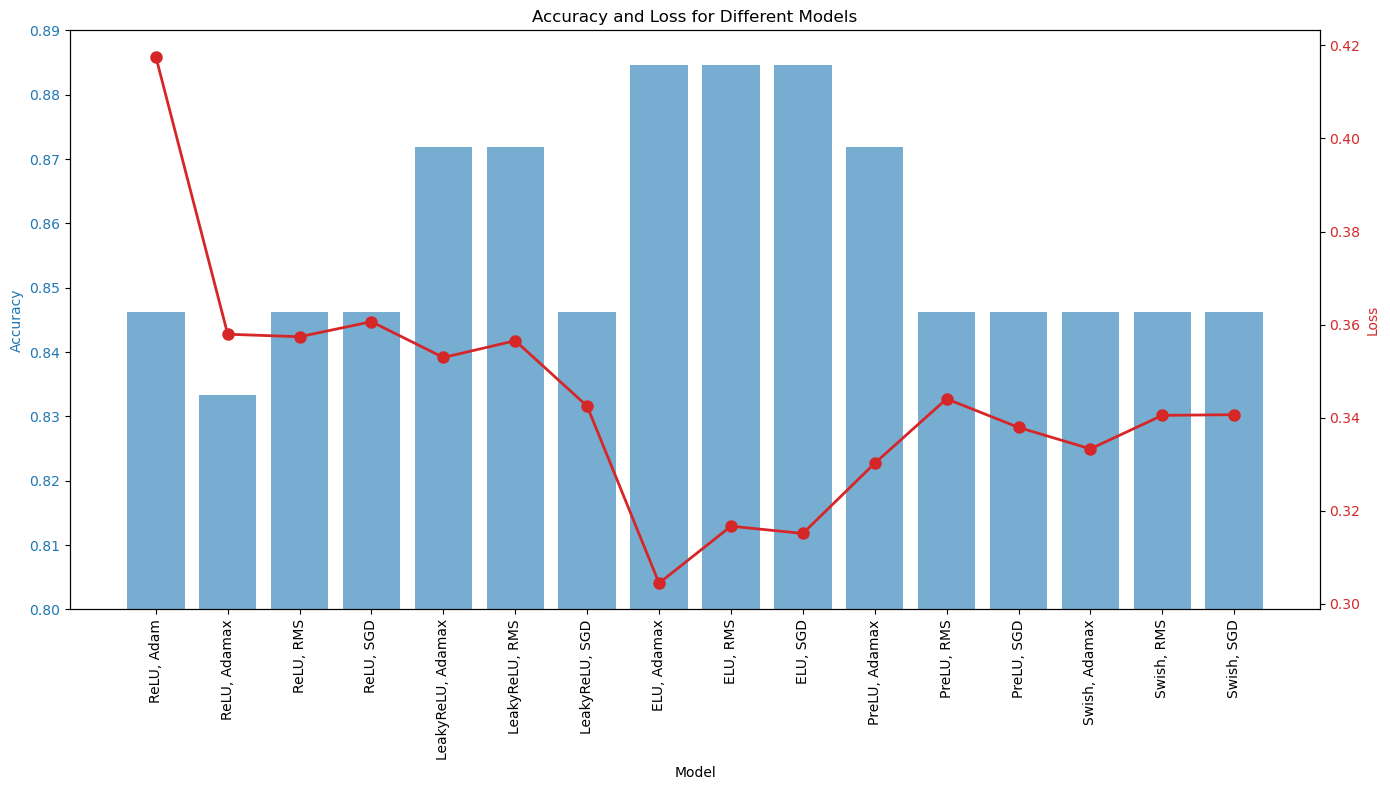

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_list,
    'Loss': loss_list
})

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Accuracy
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(df['Model'], df['Accuracy'], color=color, alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df['Model'], rotation=90)
ax1.set_ylim(0.8, 0.89)  # Set the y-axis limit for Accuracy

# Create a second y-axis for Loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(df['Model'], df['Loss'], color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='Loss')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Accuracy and Loss for Different Models')
fig.tight_layout()
plt.show()
